# Анализ бизнес-показателей

Описание проекта
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

# План работы


1. [**Загрузка данных и подготовка их к анализу.**](#1-bullet) 

    Загрузка данных, сохранение, форматирование, корректировка.


2. [**Создание функции для расчёта и анализа LTV, ROI, удержания и конверсии.**](#2-bullet) 

    Функции для вычисления значений метрик:

    * get_profiles() — для создания профилей пользователей,
    * get_retention() — для подсчёта Retention Rate,
    * get_conversion() — для подсчёта конверсии,
    * get_ltv() — для подсчёта LTV.

    Функции для построения графиков:


    * filter_data() — для сглаживания данных,
    * plot_retention() — для построения графика Retention Rate,
    * plot_conversion() — для построения графика конверсии,
    * plot_ltv_roi — для визуализации LTV и ROI.
    

3. [**Исследовательский анализ данных.**](#3-bullet) 

    * Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
    * Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
    * Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
    * Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


4. [**Маркетинг.**](#4-bullet) 

    * Посчитайте общую сумму расходов на маркетинг.
    * Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
    * Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
    * Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.


5. [**Оценка окупаемости рекламы.**](#5-bullet) 

    * Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
    * Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.
    * Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
    * Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
    * Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


6. [**Выводы.**](#6-bullet) 

    Сформировать общий вывод по работе.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd

from datetime import datetime, timedelta

from matplotlib import pyplot as plt

import numpy as np

import seaborn as sns

<a class='anchor' id='1-bullet'></a>
## Загрузка данных и подготовка их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

### Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы

In [2]:
# считаем данные о визитах из файла в переменную 'visits'
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv', sep=',')
except:
    visits = pd.read_csv(r"C:\Users\Александр\Desktop\Аналитика данных\ПРОЕКТЫ\Анализ бизнес-показателей\visits_info_short.csv", sep=',')
    
# считаем данные о заказах из файла в переменную 'orders'
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv', sep=',')
except:
    orders = pd.read_csv(r"C:\Users\Александр\Desktop\Аналитика данных\ПРОЕКТЫ\Анализ бизнес-показателей\orders_info_short.csv", sep=',')
    
# считаем данные о расходах из файла в переменную 'costs'
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv', sep=',')
except:
    costs = pd.read_csv(r"C:\Users\Александр\Desktop\Аналитика данных\ПРОЕКТЫ\Анализ бизнес-показателей\costs_info_short.csv", sep=',')

### Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме

##### Набор данных о визитах. Датафрейм "visits".

In [3]:
# выводим первые 5 строк датафрейма 'visits' для ознакомления
display(visits.head(5))

# выведем информацию о данных из 'visits'
print(visits.info(), '\n')

# выведем информацию о дубликатах в датафрейма 'visits'
print(f'Количество дубликатов в датафрейме "visits" = {visits.duplicated().sum()}')

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None 

Количество дубликатов в датафрейме "visits" = 0


In [4]:
# изменим регистр названий столбцов на нижний и заменим пробелы на "_"
visits.columns = list(map(lambda x: x.lower().replace(' ', '_'), visits.columns))

# поменяем типы данных в столбцах 'session_start' и 'session_end' на 'datetime64'
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

# добавим столбцы с годом, месяца, дня первого посещения, а также длительностью каждой сессии в секундах
visits['session_year'] = visits['session_start'].astype('datetime64[Y]')
visits['session_month'] = visits['session_start'].astype('datetime64[M]')
visits['session_day'] = visits['session_start'].astype('datetime64[D]')
visits['session_duration_sec'] = (visits['session_end'] - visits['session_start']).dt.seconds


# выведем данные после изменений
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   user_id               309901 non-null  int64         
 1   region                309901 non-null  object        
 2   device                309901 non-null  object        
 3   channel               309901 non-null  object        
 4   session_start         309901 non-null  datetime64[ns]
 5   session_end           309901 non-null  datetime64[ns]
 6   session_year          309901 non-null  datetime64[ns]
 7   session_month         309901 non-null  datetime64[ns]
 8   session_day           309901 non-null  datetime64[ns]
 9   session_duration_sec  309901 non-null  int64         
dtypes: datetime64[ns](5), int64(2), object(3)
memory usage: 23.6+ MB


##### Набор данных о заказах. Датафрейм "orders".

In [5]:
# выводим первые 5 строк датафрейма 'orders' для ознакомления
display(orders.head(5))

# выведем информацию о данных из 'orders'
print(orders.info(), '\n')

# выведем информацию о дубликатах в датафрейма 'orders'
print(f'Количество дубликатов в датафрейме "orders" =  {orders.duplicated().sum()}')

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None 

Количество дубликатов в датафрейме "orders" =  0


In [6]:
# изменим регистр названий столбцов на нижний и заменим пробелы на "_"
orders.columns = list(map(lambda x: x.lower().replace(' ', '_'), orders.columns))

# поменяем тип данных в столбце 'event_dt' на 'datetime64'
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

# создадим столбец "date", содержащий только дату заказа
orders['date'] = pd.to_datetime(orders['event_dt'].dt.date)

# выведем данные после изменений
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
 3   date      40212 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 1.2 MB


##### Набор данных о расходах. Датафрейм costs.

In [7]:
# выводим первые 5 строк датафрейма 'costs' для ознакомления
display(costs.head(5))

# выведем информацию о данных из 'costs'
print(costs.info(), '\n')

# выведем информацию о дубликатах в датафрейма 'costs'
print(f'Количество дубликатов в датафрейме "costs" =  {costs.duplicated().sum()}')

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None 

Количество дубликатов в датафрейме "costs" =  0


In [8]:
# изменим регистр названий столбцов на нижний
costs.columns = list(map(lambda x: x.lower(), costs.columns))

# поменяем тип данных в столбце 'dt' на 'datetime64'
costs['dt'] = pd.to_datetime(costs['dt'])

# выведем данные после изменений
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


**Вывод 1**

Итак, мы загрузили данные в 3 датафрейма и изучили общую информацию по каждому из них.

* *visits* - данные о визитах содержат 6 столбцов и 309901 строку, из которых 0 пропусков и 0 дубликатов. Типы данных: "int64" и "object". Типы данных в столбцах 'Session Start' и 'Session End' изменены на 'datetime64'. Регистр названий столбцов замененен на нижний, а пробелы заполнены нижним подчеркиванием "_".

* *orders* - данные о заказах содержат 3 столбца и 40212 строк, из которых 0 пропусков и 0 дубликатов. Типы данных: "int64", "object" и "float64". Тип данных в столбце 'Event Dt' изменен на 'datetime64', а также добавлен столбец "date" с датой заказа. Регистр названий столбцов замененен на нижний, а пробелы заполнены нижним подчеркиванием "_".


* *costs* - данные о расходах содержат 3 столбца и 1800 строк, из которых 0 пропусков и 0 дубликатов. Типы данных: "object" и "float64". Тип данных в столбце 'dt' изменен на 'datetime64'. Регистр названий столбцов замененен на нижний.


Данные во всех трёх датафреймах откорректированы, пропусков и дубликатов не содержат. Можем приступать к анализу.

<a class='anchor' id='2-bullet'></a>
## Создание функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### **Зададим функции для вычисления метрик**

##### Функция для создания профилей пользователей "get_profiles()"

In [9]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = pd.to_datetime(profiles['first_ts'].dt.date)
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### Функция для подсчёта Retention Rate "get_retention()"

In [10]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

##### Функция для подсчёта конверсии "get_conversion()"

In [11]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### Функция для подсчёта LTV "get_LTV()"

In [12]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Зададим функции для построения графиков

##### Функция для сглаживания данных "filter_data()"

In [13]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

##### Функция для построения графика Retention Rate "plot_retention()"

In [14]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

##### Функция для построения графика конверсии "plot_conversion()"

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### Функция для визуализации LTV и ROI "plot_ltv_roi()"

In [16]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Вывод 2**

В данном разделе были добавлены следующие функции:

* *Функции для вычисления значений метрик*:

  - get_profiles() — для создания профилей пользователей,
  - get_retention() — для подсчёта Retention Rate,
  - get_conversion() — для подсчёта конверсии,
  - get_ltv() — для подсчёта LTV.
  
  
* *А также функции для построения графиков*:

  - filter_data() — для сглаживания данных,
  - plot_retention() — для построения графика Retention Rate,
  - plot_conversion() — для построения графика конверсии,
  - plot_ltv_roi — для визуализации LTV и ROI.
  
В последующем анализе данные функции понадобятся для проведения исследования.

<a class='anchor' id='3-bullet'></a>
## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Составим профили пользователей.

In [17]:
# запишем данные о профилях пользователей в переменную "profiles"
profiles = get_profiles(visits, orders, costs)

# выведем информацию о датафрейме "profiles"
print(profiles.info())

# выведем первые 5 строк датафрейма "profiles"
display(profiles.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  datetime64[ns]
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 10.4+ MB
None


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Профили пользователей составлены корректно. 

Теперь определим минимальную и максимальную даты привлечения пользователей и поместим их в переменные *"min_date"* и *"max_date"* соответственно.

In [18]:
# найдем минимальную дату
min_date = min(profiles['first_ts'])

# выведем самую раннюю дату привлечение пользователей
print(f'Самая ранняя дата привлечения пользователей: {min_date}')

Самая ранняя дата привлечения пользователей: 2019-05-01 00:00:41


In [19]:
# найдем максимальную дату
max_date = max(profiles['first_ts'])

# выведем самую позднюю дату привлечение пользователей
print(f'Самая поздняя дата привлечения пользователей: {max_date}')

Самая поздняя дата привлечения пользователей: 2019-10-27 23:59:04


Диапазон наших исследований с 01 мая 2019 года по 01 ноября 2019 года. Момент анализа 01 ноября 2019 года с горизонтом, равным 14 дням. Значит, минимальная и максимальная даты полностью нас устраивают.

### Изучим страны, из которых приходят пользователи

In [20]:
# создадим датафрейм "country" с названиями регионов, общим количеством пришедших пользователей и количеством платящих пользователей из каждого региона
country = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'}).rename(columns = {'user_id': 'count'})

# добавим столбец "dolya_payer" с долей платящих пользователей для каждого региона, выраженной в процетнах
country['dolya_payer'] = np.round((country['payer'] / country['count']) * 100, 2)

# выведем первые 5 строк получившегося датафрейма
country.sort_values(by='payer', ascending=False)

,count,payer,dolya_payer
region,,,
United States,100002,6902,6.90
UK,17575,700,3.98
France,17450,663,3.80
Germany,14981,616,4.11


**Самое большое количество платящих пользователей принадлежит США (6902 пользователя)**. Этой же стране принадлежит и рекорд по общему количеству пользователей (100002), и доля платящих пользователей (6.90%).

**Меньше всего платящих** пользователей приходит из **Германии (всего 616 пользователей)**, при этом **наименьшим процентом платящих** пользователей отличилась **Франция (всего 3.80%)**.

### Изучим гаджеты, которые чаще юзают наши пользователи

In [21]:
# создадим датафрейм "gadjet" с названиями гаджетов, общим количеством пришедших пользователей и количеством платящих пользователей, пользующихся тем, или иным гаджетом
gadjet = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).rename(columns = {'user_id': 'count'})

# добавим столбец "dolya_payer" с долей платящих пользователей для каждого гаджета, выраженной в процетнах
gadjet['dolya_payer'] = np.round((gadjet['payer'] / gadjet['count']) * 100, 2)

# выведем первые 5 строк получившегося датафрейма
gadjet.sort_values(by='payer', ascending=False)

,count,payer,dolya_payer
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
Mac,30042,1912,6.36
PC,30455,1537,5.05


**Наибольшее количество платящих пользователей пользуются iPhone (3382)**. Данному смартфону принадлежит и наибольшее общее количество пользователей (целых 54479). При этом **наибольшей долей платящих пользователей отличился Mac (6.36%)**.

**В аутсайдерах по количеству платящих пользователей и доле находится PC (1537, доля 5.05%)**, по **общему количеству пользователей Mac (3042)**.

### Изучим рекламные источники, из которых приходили пользователи

In [22]:
# создадим датафрейм "channel" с названиями каналов, общим количеством пришедших пользователей и количеством платящих пользователей, пришедших из того, или иного канала
channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).rename(columns = {'user_id': 'count'})

# добавим столбец "dolya_payer" с долей платящих пользователей для каждого канала, выраженной в процетнах
channel['dolya_payer'] = np.round((channel['payer'] / channel['count']) * 100, 2)

# выведем первые 5 строк получившегося датафрейма
channel.sort_values(by='dolya_payer', ascending=False)

,count,payer,dolya_payer
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


**Вывод 3**

Данные о пользователях, представленные в датафрейме "profiles" принадлежат временному промежутку, находящему между 01.05.2019 и 27.10.2019 (даты включены в промежуток).

В ходе выполнения данного раздела были созданы 3 датафрейма с данными о пользователях, сгруппированным по различным признакам:

1. *"country"* группировка по регионам показала:
   * **Наибольшее количество платящих пользователей приходит из США (6902 пользователя совершили  покупки). Данный регион также отличился наибольшей долей платящих, равной 6.90%.** 
   * **К наименее платящему региону относится Германия по количеству платящих пользователей (616) и Франция по доле платящих пользователей (3.80%).**
   
   
2. *"gadjet"* группировка по гаджетам показала:
   * **Наибольшее количество платящих пользователей пользуются iPhone (3382 пользователя совершили  покупки, доля 6.21%). При этом наивысшей долей платящих пользователей отличился Mac (доля 6.36%, 1912 платящих пользователей).** 
   * **Наименьшее количество платящих пользователей и наимаеньшая доля принадлежит PC (1537, доля 5.05%).**
   
   
3. *"channel"* группировка по рекламным каналам показала:
   * **Наибольшее количество платящих пользователей привлекли платформы FaceBoom, Tip Top и organic (3557, 1878 и 1160 платящих соответственно). Наименьшее количество у lambdaMediaAds (225), YRabbit (165) и MediaTornado (156)**. 
   * **Рекордсмены по доле платящих пользователей FaceBoom, AdNonSense и lambdaMediaAds (12.20%, 11.34% и 10.47% соответственно). К аутсайдерам же относятся LeapBob (3.06%), OppleCreativeMedia (2.71%) и organic (всего 2.06%).**
   
По итогу проведенного исследовательского анализа можно сделать вывод, что наиболее привлекательным для бизнеса являются пользователи из США, пользующиеся iPhone и/или Mac, привлеченные через платформы FaceBoom, Tip Top, AdNonSense, lambdaMediaAds или пришедшие без рекламных посредников.

<a class='anchor' id='4-bullet'></a>
## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Рассчитаем общую сумму расходов на маркетинг

In [23]:
# проведем рассчеты общих затрат на рекламу и поместим в переменную "total_costs"
total_costs = np.round(costs['costs'].sum(), 1)

# выведем общую сумму затрат на рекламу
print(f'Общие затраты на рекламу составали {total_costs} монет')

Общие затраты на рекламу составали 105497.3 монет


### Рассчитаем распределение затрат на маркетинг по рекламным источникам

In [24]:
# сгруппируем траты по рекламным источникам в датафрейме "mark_costs"
mark_costs =costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False).reset_index()

# выведем траты по рекламным источникам
mark_costs

,channel,costs
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


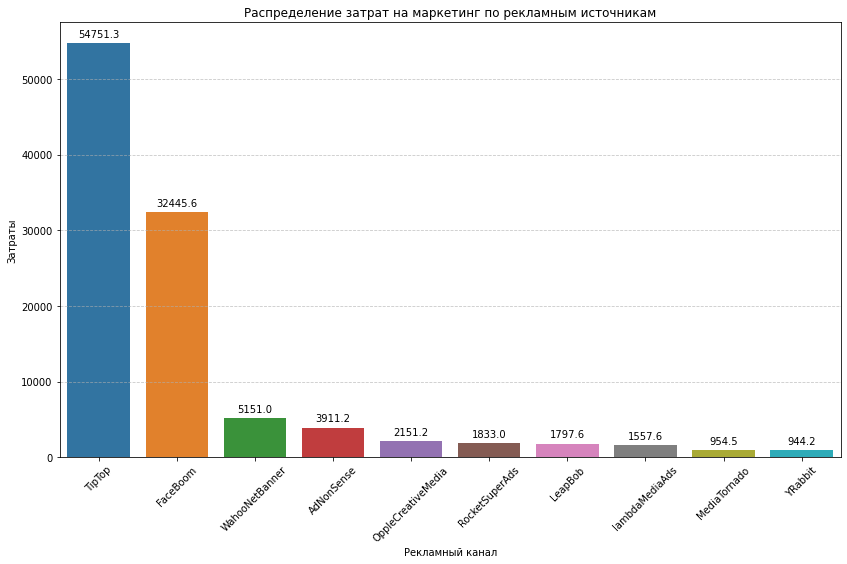

In [25]:
# визуализируем распределение затрат на маркетинг по рекламным каналам с помощью столбчатой диаграммы
plt.figure(figsize=(14, 8))
splot=sns.barplot(data=mark_costs, x="channel", y="costs")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Распределение затрат на маркетинг по рекламным источникам')
plt.ylabel('Затраты')
plt.xlabel('Рекламный канал')
plt.xticks(rotation=45)

plt.show()

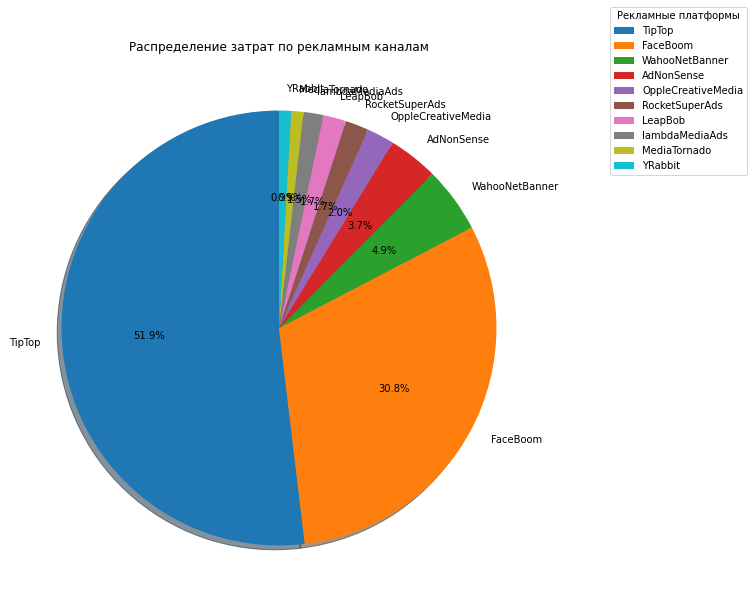

In [26]:
# Построение круговую диаграммы
plt.figure(figsize=(10, 10))
plt.pie(mark_costs['costs'], labels=mark_costs['channel'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Распределение затрат по рекламным каналам')
plt.legend(title="Рекламные платформы", bbox_to_anchor=(1.1, 1.1), loc='best')

plt.show()

Как видно из таблицы и столбчатого графика более 50000 монет (свыше 50% от общих затрат на маркетинг) уходит всего на один рекламный канал *Tip Top*. Также, значительные затраты уходят на *FaceBoom* (более 30000 монет, более 30%) и WahooNetBanner (более 5000 монет, порядка 5%). Возможно, данные каналы являются основными платформами для привлечения клиентов, либо же их услуги очень дороги. Стоит внимательно изучить окупаемость затрат на эти три канала, рассчитав возврат на инвестиции (ROI). 

На остальные платформы затраты не превысили 5000 монет, или 5%, что может говорить о низком уровне конверсии, либо низкой стоимости услуг данных каналов. Ответы на данные вопросы помогут дать рассчеты совокупной прибыли LTV и возврата на инвестиции ROI.

### Визуализируем динамику изменения расходов во времени

In [27]:
# добавим в датафрейм "costs" столбец с неделей WAU
costs['dt_week'] = costs['dt'].dt.isocalendar().week

# добавим в датафрейм "costs" столбец с месяцем MAU
costs['dt_month'] = costs['dt'].dt.month

# выведем "costs"
costs.head()

,dt,channel,costs,dt_week,dt_month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


##### По неделям

In [28]:
# создадим датафрейм "costs_week" с группирвокой затрат на рекламу по неделям
costs_week = costs.groupby(['dt_week', 'channel']).agg({'costs': 'sum'}).reset_index()
costs_week.head()

,dt_week,channel,costs
0,18,AdNonSense,211.05
1,18,FaceBoom,535.70
2,18,LeapBob,16.80
3,18,MediaTornado,38.64
4,18,OppleCreativeMedia,24.00


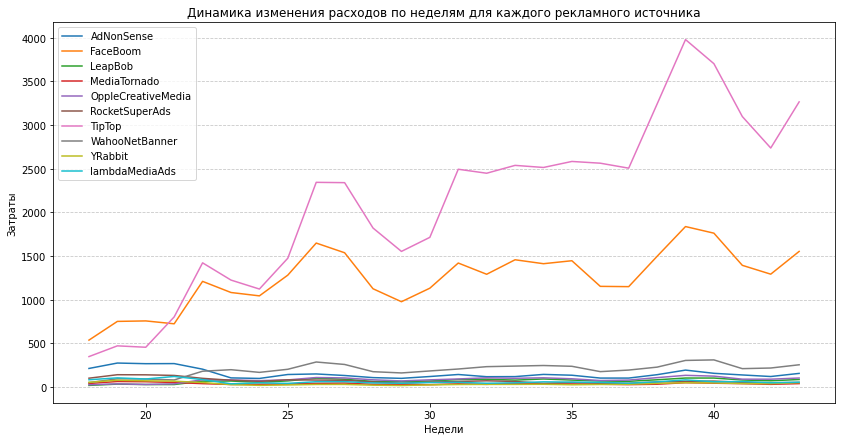

In [29]:
# Визуализируем динамику изменения расходов во времени по неделям для каждого источника
plt.figure(figsize=(14, 7))

for i in costs_week['channel'].unique(): 
    costs_channel_w = costs_week[costs_week['channel'] == i]  
    plt.plot(costs_channel_w['dt_week'], costs_channel_w['costs'], label=i)
   
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Динамика изменения расходов по неделям для каждого рекламного источника')
plt.xlabel('Недели')
plt.ylabel('Затраты')
plt.legend()

plt.show()

##### По месяцам

In [30]:
# создадим датафрейм "costs_month" с группирвокой затрат на рекламу по неделям
costs_month = costs.groupby(['dt_month', 'channel']).agg({'costs': 'sum'}).reset_index()
costs_month.head()

,dt_month,channel,costs
0,5,AdNonSense,1169.70
1,5,FaceBoom,3524.40
2,5,LeapBob,140.28
3,5,MediaTornado,238.56
4,5,OppleCreativeMedia,169.75


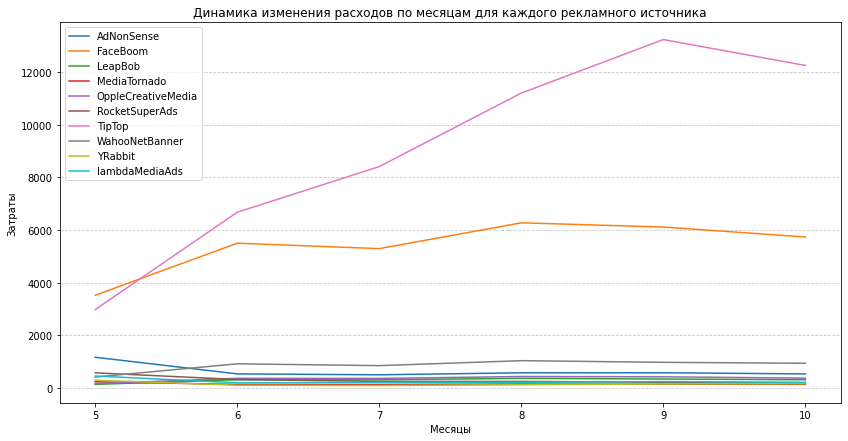

In [31]:
# Визуализируем динамику изменения расходов во времени по месяцам для каждого источника
plt.figure(figsize=(14, 7))

for i in costs_month['channel'].unique(): 
    costs_channel_m = costs_month[costs_month['channel'] == i]  
    plt.plot(costs_channel_m['dt_month'], costs_channel_m['costs'], label=i)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Динамика изменения расходов по месяцам для каждого рекламного источника')
plt.xlabel('Месяцы')
plt.ylabel('Затраты')
plt.legend()

plt.show()

На обоих графиках (недельном и месячном) легко заметить глобальный восходящий тренд стоимости маркетинга для двух топовых платформ *Tip Top* и *FaceBoom*.  Недельный график ожидаемо более рваный, на нем отображены частые колебания затрат. При этом на месячном графике виден стабильный рост затрат. Пик затрат приходится на 9 месяц, или на 38-40 недели года. Также стоит отметить достаточно явную корреляцию между динамикой затрат этих двух платформ. Оба графика говорят также и о том, что в самом начале наблюдений затраты "FaceBoom" были самыми высокими. Однако, менее, чем через месяц отдали первое место платформе "Tip Top".

Что же касается остальных платформ, то тут все более менее стабильно. Не наблюдается особых всплесков, либо падений затрат. Разве что, стоит отметить, что платформа "WahooNetBanner" не всегда была на третьем месте по затратам. В начале исследований это место занимала "AdNonSense".

В общем, можно сказать, что, начиная с 5 месяца, или 22 недели, компания стала делать явный упор на рекламу через платформы "WahooNetBanner", "FaceBoom" и в особенности "Tip Top". Надо думать, что эти 3 канала приносят больше всего прибыли и окупаются с лихвой. Стоит проверить!
Остальные 7 платформ являются стабильным фундаментом. Так сказать - текучкой, приносящей небольшое, но стабильное количество клиентов.

### Рассчитаем среднюю стоимость привлечения пользователей (CAC) из каждого источника

Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [32]:
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [33]:
# создадим переменную "mean_CAC" хранящую общие средние затраты на привлечение одного клиента
mean_CAC = profiles['acquisition_cost'].mean()

print(f'Общие средние затраты на привлечение одного клиента равняются {mean_CAC:.{3}f}')

Общие средние затраты на привлечение одного клиента равняются 0.703


In [34]:
# создадим датафрейм "cost_per_client" со средними значениями затрат на привлечение одного клиента CAC по каждой платформе
cost_per_client = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False).reset_index()

# выведем содержание датафрейма "cost_per_client"
display(cost_per_client)

,channel,acquisition_cost
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


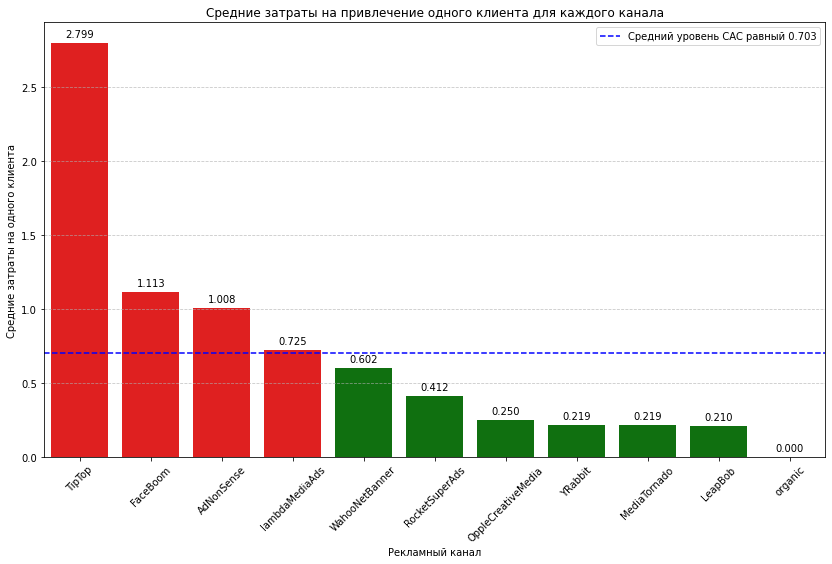

In [35]:
# визуализируем средние значения затрат на одного клиента "CAC" для каждой рекламной платформы 
plt.figure(figsize=(14, 8))

# создадим список с цветами столбцов. Цвета выбраны относительно общего среднего CAC. Выше - зеленый цвет, ниже - красный цвет
colors = ['green' if x < mean_CAC else 'red' for x in cost_per_client['acquisition_cost']]
splot=sns.barplot(data=cost_per_client, x="channel", y="acquisition_cost", palette=colors)


for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Средние затраты на привлечение одного клиента для каждого канала')
plt.ylabel('Средние затраты на одного клиента')
plt.xlabel('Рекламный канал')
plt.xticks(rotation=45)

plt.axhline(y=mean_CAC, color='blue', linestyle='--', label=f'Средний уровень CAC равный {mean_CAC:.{3}f}')

plt.legend()
plt.show()

Общие средние затраты на привлечение одного клиента составляют 0.703 монет. Согласно столбчатому графику данное значение превышают следующие рекламные платформы:
* *Tip Top* - 2.799 монет на привлечение одного клиента;
* *FaceBoom* - 1.113 монет на привлечение одного клиента;
* *AdNonSense* - 1.008 монет на привлечение одного клиента;
* *lambdaMediaAds* - 0.725 монет на привлечение одного клиента.
Из списка особенно выбивается платформа "Tip Top", чьи затраты составляют заоблачные 2.799 монет на одного клиента. Выходит, огромные затраты на платформы "Tip Top" и "FaceBoom" и правда обусловлены большой стоимостью привлечение. Остается надеяться, что такие "дорогие" клиенты и денег приносят соответствующие.

Стоит отметить платформу "WahooNetBanner" - третью по общим затратам. При этом средние затраты находятся под чертой средних затрат и равняется 0.602 монет, что является достаточно хорошим результатам. 

**Вывод 4**

1. **Общие затраты на рекламу составили 105497.3 монет.**


2. **Топ 3 платформы, с наибольшими затратами:**

   1) *TipTop* - 54751.3 монет, или 51,9%.
   
   2) *FaceBoom* - 32445.6 монет, или 30,8%.
   
   3) *WahooNetBanner* - 5151.0 монет, или 4,9%.
   
Возможно, данные каналы являются основными платформами для привлечения клиентов, либо же их услуги очень дороги. **Затраты остальных 7 платформ не превышают и 4% от общих затрат на маркетинг.**


3. С течением времени затраты на рекламы увеличивались по 3 каналам. **Начиная с 5 месяца, или 22 недели, компания стала делать явный упор на рекламу через платформы "WahooNetBanner", "FaceBoom" и в особенности "Tip Top".**


4. **Средние затраты на привлечение одного клиента составляют 0.703 монет. Данное значение превышают затраты на 4 платформах:**
   * *Tip Top* - 2.799 монет на привлечение одного клиента;
   * *FaceBoom* - 1.113 монет на привлечение одного клиента;
   * *AdNonSense* - 1.008 монет на привлечение одного клиента;
   * *lambdaMediaAds* - 0.725 монет на привлечение одного клиента.
   
Из проведенного исследования следует, что компания делает особенный упор на рекламу через 3 платформы - *Tip Top*, *FaceBoom* и *WahooNetBanner*. При этом по средним затратам *WahooNetBanner* находится ниже средних затрат на одного привлеченного клиента, что говорит о большом объеме клиентов. А вот платформы *AdNonSense* и *lambdaMediaAds*, хоть и имеют небольшие общие затраты на рекламу, при этом и клиентов привлекают хуже остальных, о чем говорят их затраты на привлечение клиента, превышающие среднее значение.

Пока что, клиенты, привлекаемые через *Tip Top* и *FaceBoom* остаются очень дорогими. Стоит проверить, сколько эти клиенты приносят денег.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Наиболее дорогостоящим каналом привлечения пользователей является TipTop, однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.
    
</div>

<a class='anchor' id='5-bullet'></a>
## Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [36]:
# создадим момент
observation_date = datetime(2019, 11, 1)

# создадим горизонт анализа
horizon_days = 14

**Ввиду того, что нам необходимо провести анализ окупаемости рекламы, исключим органические каналы из датафреймов *profiles* и *visits* при построении графиков.**

### Расчет и визуализация LTV и ROI

In [37]:
# расчитаем LTV и ROI
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles[profiles['channel'] != 'organic'], orders, 
                                                         observation_date, horizon_days)

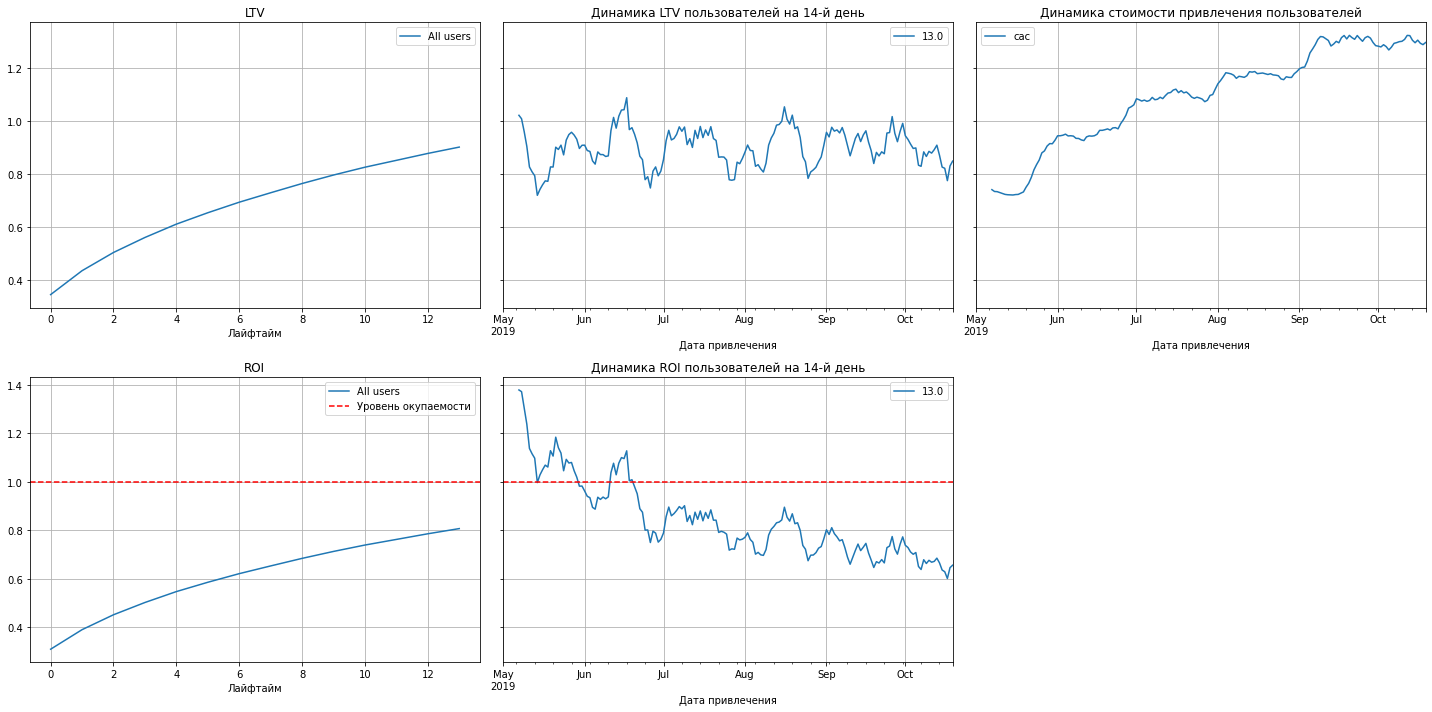

In [38]:
# визуализируем графики LTV и ROI
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

*Вывод 5.1 по LTV и ROI*


1. График LTV (средняя выручка с одного клиента) ожидаемо растет, но не дотягивает до 1 монеты.
2. Динамика LTV на 14-ый день носит цикличный характер с длиной цикла, равной примерно месяцу. Она колеблется между 0,7 и 1,1 монетами.
3. Динамика стоимости привлечения пользователей имеет стабильный рост на протяжении всего периода наблюдений, с выходом в небольшое плато с Сентября. Данный факт обоснован большим увеличением затрат на 2 топовые рекламные платформы: *TipTop* и *FaceBoom*.
4. График ROI показывает, что по состоянию на 14-ый день окупаемость привлечения одного пользователся составляет пордка 0,8, что говорит о финансовой неэффективности рекламной компании в целом.
5. Динамика изменения ROI на 14-ый день говорит о том, что до начала мая реклама окупалась, но, начиная с июня реклама окупаться перестала и стабильно движется вниз.

*Итог*

На данный момент пользователи, пришедшие через рекламные платформы не окупают затраты на свое привлечение за 14 дней. Данная ситуация образовалась одновременно с резким увеличением затрат на такие рекламные платформы, как *Tip Top* и *FaceBoom*. Вряд ли данную корреляцию можно назвать случайностью.


### Расчет и визуализация конверсии

In [39]:
# расчитаем конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders,
                                                            observation_date, horizon_days)

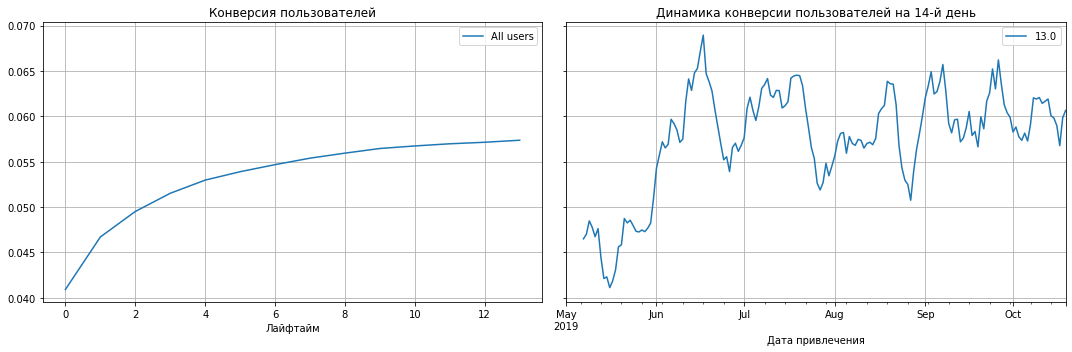

In [40]:
# визуализируем графики конверсию
plot_conversion(conversion_grouped, conversion_history, horizon_days)

*Вывод 5.2 по конверсии*

1. График конверсии пользователей имеет характерный вид. По состоянию на 14-ый день конвертируется порядка 5.75% посетителей.
2. График динамики конверсии показывает резкий скачок с началом июня (от 4.25% на дне графика, до пости 7% на пике), за которым последовали циклы падений и роста с размером цикла, примерно равным месяцу. Реальная линия динамики конверсии (примерно 5.75%%) стремится к горизонтальному положению (начиная с июня).

*Итог*

С активным началом инвестирования в рекламные платформы *Tip Top* и *FaceBoom* (начиная с июня) конверсия на 14-ый день резко увеличилась и в среднем стала составлять 5.75%, вместо 4.5% в мае. Значит, большие затраты приносят свои плоды, люди чаще совершают целевые действия, однако для окупаемости этого все равно недостаточно.

### Расчет и визуализация удержания

In [41]:
# расчитаем удержание
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, 
                                                           observation_date, horizon_days)

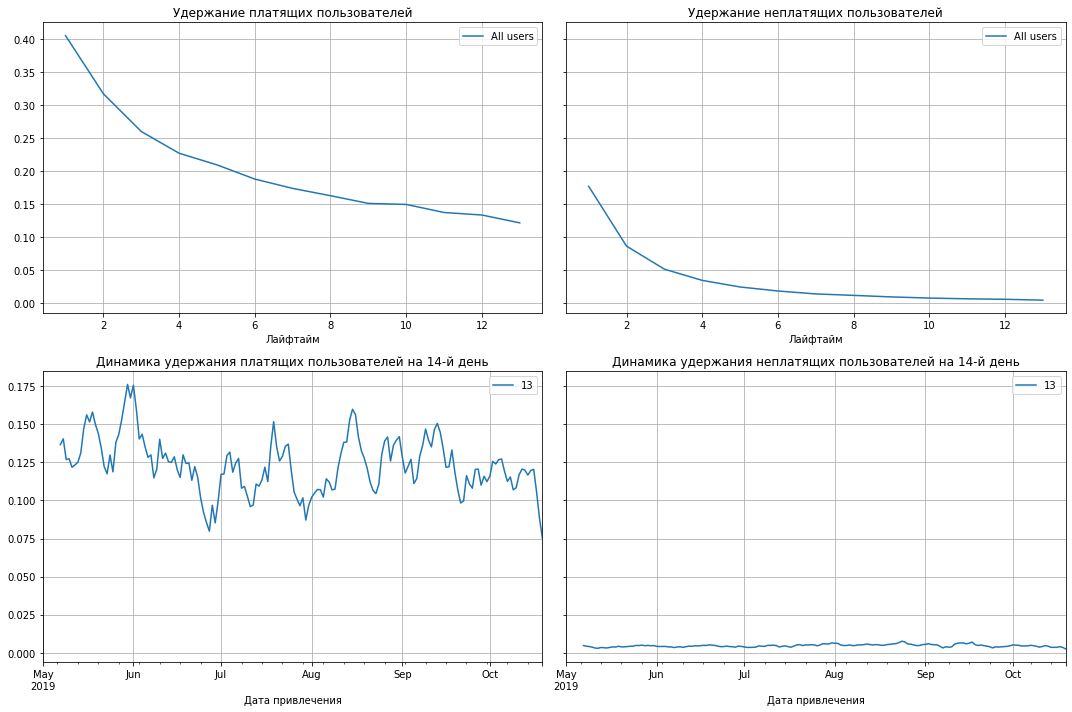

In [42]:
# визуализируем графики удержания
plot_retention(retention_grouped, retention_history, horizon_days)

*Вывод 5.3 по удержанию*

1. Удержание платящих пользователей ожидаемо значительно выше неплатящих, и на 14-ый день составляет порядка 12%, против 1%.
2. Динамика удержания платящих пользователей на 14-ый день выглядит несколько удручающе, так как с началом увеличения затрат на рекламу график пошел не вверх, а вниз. Он также имеет цикличный характер (активный рост быстро сменяется столь же активным падением) с длительностю цикла, равной примерно месяцу. В общем график имеет понижательный характер с резким устремление вниз и пробоем прежнего минимума (8.5%) в конце октября (приблизился к отметке в 7.5%).
3. Динамика удержания неплатящих пользователей на 14-ый день не имеет особых изменений и находится в районе 1%.

*Итог* 

Несмотря на наибольший пик приходящийся на начало июня, который находится на отметке 17.5% общая картинка удержания пользователей имеет понижательный характер. График идет вниз с чередующимися отскоками вверх и падениями вниз. А в конце октября и вовсе побил очередной антирекорд. Это говорит о неэффективности увеличившихся трат на рекламу, начавшуюся в мае-июне.

### Визуализируем окупаемость рекламы с разбивкой по устройствам

In [43]:
# расчитаем LTV и ROI с разбивкой по устройствам
result_raw_device, ltv_device, ltv_history_device, roi_device, roi_history_device = get_ltv(profiles[profiles['channel'] != 'organic'], orders, 
                                                         observation_date, horizon_days, dimensions=['device'])

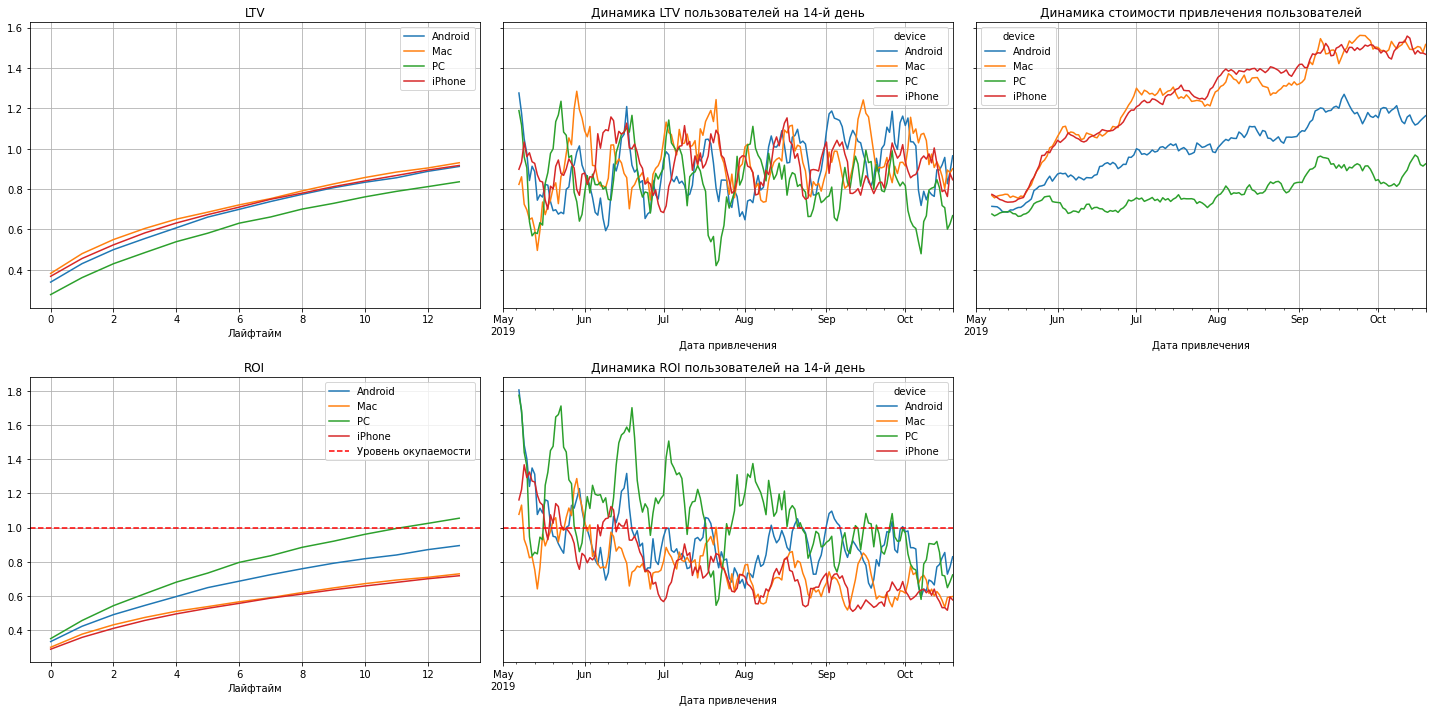

In [44]:
# визуализируем графики LTV и ROI с разбивкой по устройствам
plot_ltv_roi(ltv_device, ltv_history_device, roi_device, roi_history_device, horizon_days)

*Вывод 5.4 с разбивкой по устройствам*

1. График LTV показывает, что наибольшее количество выручки приносят пользователи Mac и iPhone. За ними следует с минимальным отставанием Android. Меньше всех приносят денег пользователи PC.
2. Динамика LTV на 14-ый день имеет общую тенденцию к сохранению среднего значения. Стоит выделить PC, график которого имеет значительные просадки в июле и октябре. Остальные девайсы имеют более стабильный график, хоть и имеет вид цикличных чередований роста и падений. При этом наибольших пиковых значений значений принимал график Mac. Стоит отметить, что до начала периода анализа (май и ранее) значения графиков Android и PC были значительно выше нынешних.
3. Динамика стоимости привлечения пользователей у всех 4 девайсов имеет повышательный характер. Однако, графики Mac и iPhone имеют большую интенсивность роста и значительную схожесть. Их линии сплелись друг с другом. Можно сказать, что привлечение пользователей этих двух девайсов одинаково высока. За ними по дороговизне привлечения следуют пользователи Android и PC, графики которых не имеют столь явного всплеска стоимости привлечения по сравнению с Mac и iPhone.
4. Судя по графику ROI окупаются только пользователи PC и то ближе к 11-ому дню. Пользователи Android не окупаются даже за 14 дней (порядка 90%). А вот графики Mac и iPhone имеют практически идентичную визуализацию, а об их окупаемости и речи не идет (порядка 75%).
5. График динамики ROI являет интересную картину. С увеличением затрат на рекламу пользователи всех 4 девайсов в мае перестали окупаться. Правда, затем график каждого девайся поднимался над линией окупаемости, однако в октябре абсолютно все пользователи остались под данной линией, то есть перестали окупаться. Дольше всех держались пользователи PC, их дела стали стабильно плохи в сетнябре-октябре. Android "сдался" в июне-июле, а Mac с iPhone в мае-июле.

*Итог* 

Больше всего выручки приносят пользователи Mac, iPhone и Android. Наименее привлекательным и наиболее нестабильным являются пользователи PC. Однако, пользователи Android, а в особенности Mac и iPhone обходятся компании значительно дороже. Этим обусловлен следующей факт - в среднем окупается привлечени только пользователей PC. Но и это не является апогеем негативных заключений. К моменту проведения исследования (1 ноября 2019 год) перестали окупаться пользователи всех 4 девайсов. 

Увеличение затрат на рекламу больше всего коснулось пользователей, приносящих наибольшую выручку - Mac и iPhone, при этом аутсайдеры по части выручки, а именно пользователи PC являются единственными экономически целесообразными клиентами, которые в среднем окупают свое привлечение. 

**Выходит, что пользователи Mac и iPhone, приносящие наибольую выручку оказывают негативное влияние на общую окупаемость рекламы. В то же время единственным девайсом, пользователи которого окупаются является PC.**

### Визуализируем окупаемость рекламы с разбивкой по странам

In [45]:
# расчитаем LTV и ROI с разбивкой по странам
result_raw_region, ltv_region, ltv_history_region, roi_region, roi_history_region = get_ltv(profiles[profiles['channel'] != 'organic'], orders, 
                                                         observation_date, horizon_days, dimensions=['region'])

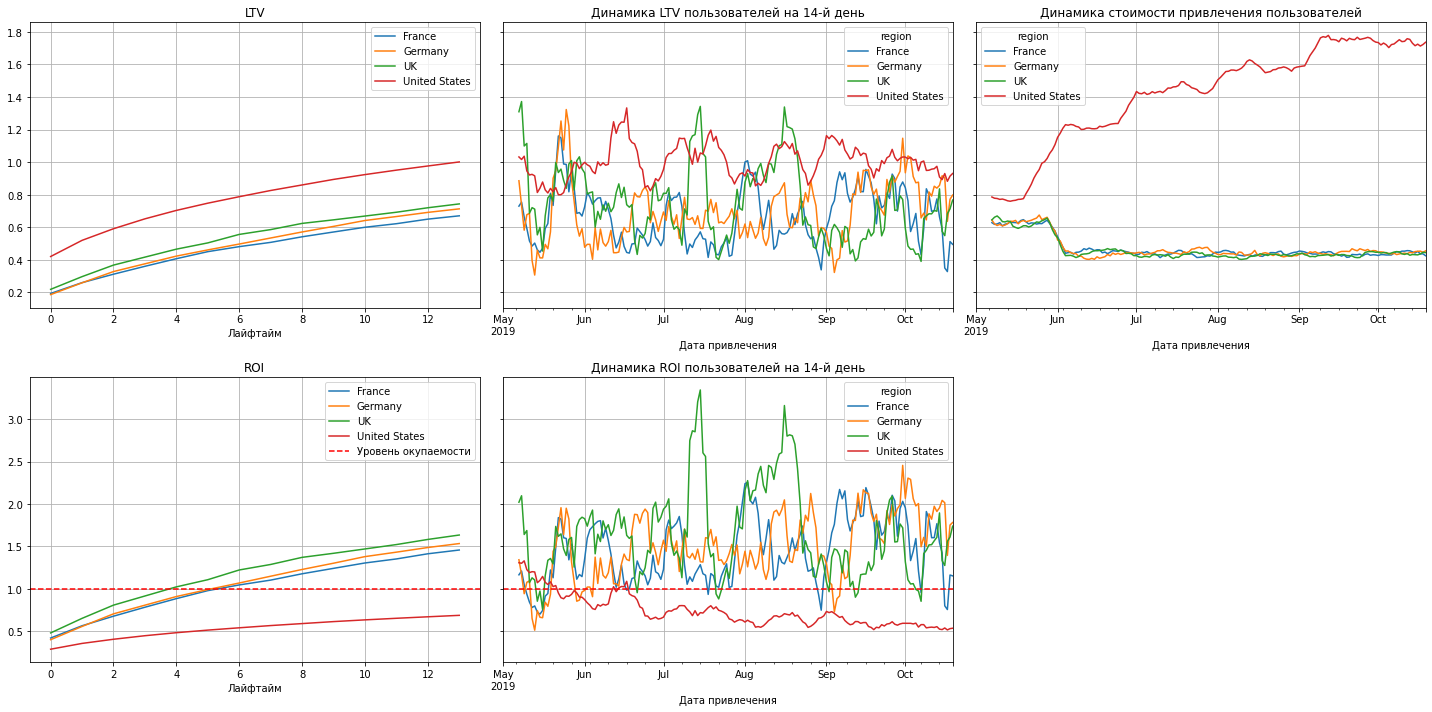

In [46]:
# визуализируем графики LTV и ROI с разбивкой по странам
plot_ltv_roi(ltv_region, ltv_history_region, roi_region, roi_history_region, horizon_days)

*Вывод 5.5 по регионам*

1. На графике LTV однозначным чемпионом по выручке на одного клиента являются США. В средней, на 14-ый день данные пользователи приносят порядка 1 монеты. За США следуют Великобритания, Германия и Франция, LTV которых находится в районе 0.7 монет.
2. Динамика LTV пользователей на 14-ый день является в общем нейтральной с наблюдающейся понижательной тенденцией, начавшейся в сетнябре. При этом, пользователи из США на 14-ый день приносят стабильно больше остальных, однако, в мае, июле и августе пользователи из Великобритании вырывались вперед, хоть и ненадолго, а пользователи из Германии были вторыми в мае после Великобритании. Меньше всех денег стабильно приносят пользователи из Франции.
3. Динамика стоимости привлечения дает интересную картину. Начиная с конца мая затраты на привлечение пользователей из Великобритании, Германии и Франции резко пошли вниз (прежняя стоимость превышала 0.6 монет) и, пробив отметку в 0.5 монет вышли в стабильное плато, не превышая 0.5 монет на привличение одного пользователя. Практически одновременни с этим, с середины мая, стоимость привлечения пользователей из США резко стала расти. С отметки в 0.8 монет в начале июня затраты выросли до более, чем 1.7 монет за пользователя. График четко отображает увеличение и перераспределение бюджета, начавшееся в мае. Компания стала меньше тратить на Европу, и значительно больше на США.
4. График ROI говорит нам о том, что лучше всех окупаются пользователи из Великобритании (уже на 4-ый день), затем пользователи из Германии и Франции, которые окупаются одновременно на 5-ый день, хоть Германия и опережает Францию по итоговому ROI на 14-ый день. А вот пользователи из США не окупаются вовсе. На 14-ый день их ROI составляет порядка 70%, тогда, как ROI пользователей из остальных стран уже приближается к отметке 150%.
5. На графике динамики ROI на 14-ый день мы видим, что пользователи из США перестали окупаться еще в мае и с тех пор стабильно окупаются все хуже и хуже, за исключением небольше периода в июне. На протяжении всего периода наблюдений пользователи из остальных стран стали окупаться даже немного лучше, несмотря на небольшие промежутки пересечения линии окупаемости вниз. При этом лучше всего себя чувствуют пользователи из Германии и особенно Великобритании, окупаемость которых на пике июля и августа превышала 300%. В среднем же, пользователи из Европы окупаются на 150-200%.

*Итог*

Мы выяснили, что увеличение затрат на рекламу произошло не только за счет новых инвестиций, но и за счет бюджета рекламы в Европе (если только пользователей из Европы вдруг не стало значительно больше, при сохранении прежнего бюджета, что вряд ли, так как случайность подобных совпадений маловероятна). Упор на привлечение пользователей из США не привел к положительному эффекту, а только загнал окупаемость данного региона в исторический минимум. При этом пользователи из Европы стали окупаться даже лучше.

**Получается, что затраты на привлечение пользователей из США оказывают негативное влияния на окупаемость рекламы в общем, тогда как Франция, Германия и в особенности Великобритания, явлются куда более экономически выгодными регионами.**

### Визуализируем окупаемость рекламы с разбивкой по рекламным каналам

In [47]:
# расчитаем LTV и ROI с разбивкой по рекламным каналам
result_raw_channel, ltv_channel, ltv_history_channel, roi_channel, roi_history_channel = get_ltv(profiles[profiles['channel'] != 'organic'], orders, 
                                                         observation_date, horizon_days, dimensions=['channel'])

In [48]:
# для наглядности выведем таблицу "ltv_channel", отсортированную по LTV 14-ого дня
display(ltv_channel.sort_values(by=13.0, ascending=False))

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
lambdaMediaAds,2056,0.460268,0.645302,0.778789,0.905540,1.041503,1.160433,1.262369,1.352169,1.444888,1.505564,1.579348,1.630316,1.695861,1.766250
TipTop,18498,0.343550,0.497389,0.624141,0.739834,0.842358,0.935707,1.013676,1.096450,1.171400,1.245485,1.311417,1.371467,1.427640,1.487908
RocketSuperAds,4251,0.207570,0.318640,0.396114,0.455980,0.515613,0.571019,0.639125,0.687255,0.737986,0.790118,0.831437,0.864307,0.898586,0.933801
WahooNetBanner,8082,0.191302,0.291477,0.378921,0.443754,0.516862,0.569469,0.631870,0.678176,0.725353,0.765488,0.812535,0.849334,0.889472,0.918615
AdNonSense,3702,0.505030,0.589149,0.644417,0.683509,0.706694,0.732582,0.754149,0.767628,0.789203,0.802682,0.806996,0.815084,0.827215,0.838006
FaceBoom,27544,0.585703,0.660825,0.700722,0.728842,0.747143,0.760369,0.774718,0.784757,0.792404,0.800775,0.806247,0.812226,0.817483,0.821469
YRabbit,4102,0.163301,0.213423,0.256000,0.303932,0.356265,0.387894,0.414656,0.438988,0.460885,0.480349,0.502245,0.524147,0.546287,0.559668
MediaTornado,4167,0.137485,0.191615,0.246943,0.293667,0.332249,0.366979,0.388534,0.418474,0.440034,0.461589,0.485541,0.508294,0.526256,0.533684
LeapBob,8103,0.107048,0.155702,0.205583,0.235391,0.259654,0.288599,0.314587,0.333802,0.369543,0.394176,0.417579,0.437902,0.457608,0.473004


In [49]:
# для наглядности выведем таблицу "roi_channel", отсортированную по ROI 14-ого дня
display(roi_channel.sort_values(by='cac', ascending=False))

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
TipTop,18498,2.757774,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
FaceBoom,27544,1.113419,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
AdNonSense,3702,1.008023,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
lambdaMediaAds,2056,0.727237,0.632899,0.887333,1.070887,1.245178,1.432136,1.595673,1.735841,1.859323,1.986818,2.070251,2.171709,2.241794,2.331922,2.428712
WahooNetBanner,8082,0.601856,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
RocketSuperAds,4251,0.417431,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
OppleCreativeMedia,8139,0.249908,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
MediaTornado,4167,0.219035,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
YRabbit,4102,0.217087,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086


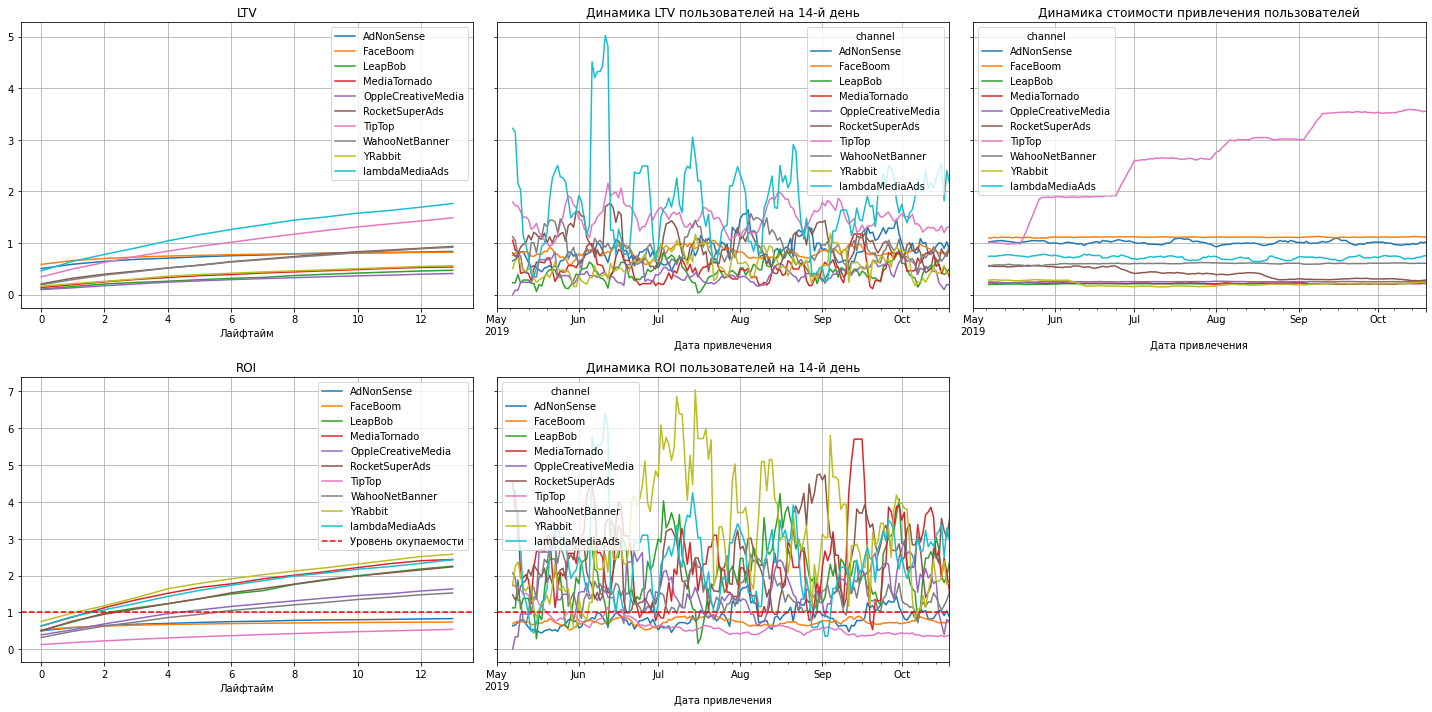

In [50]:
# визуализируем графики LTV и ROI с разбивкой по рекламным каналам
plot_ltv_roi(ltv_channel, ltv_history_channel, roi_channel, roi_history_channel, horizon_days)

*Вывод 5.6 по рекламным каналам*

1. Судя по графику LTV наиболее прибыльными являются каналы *lambdaMediaAds* (1.76 монет) и *Tip Top* (1.49 монет, при этом с самыми большими затратами). LTV пользователей с остальных каналов не превышает 1 монеты. Так, 3-е и 4-ое места занимают "RocketSuperAds" (0.93 монеты) и "WahooNetBanner" (0.92 монеты, при этом занимает 3-е место по затратам). В аутсайдерах, не набравших даже 0,5 монет "LeapBob" (0.47 монеты) и "OppleCreativeMedia" (0.41 монеты). При этом канал "FaceBoom" - второй канал по затратам, занимает 6-е место на графике LTV.
2. На графике динамики LTV на 14-ый день больше всех выделяется график канала "lambdaMediaAds". Пользователи, пришедшие с данного канала единственные приносили прибыль более 5 монет, и чаще остальных приносили более 2 монет. При всем при этом, в общем виде график не имеет ни повышательной, ни понижательной тенденции.
3. График динамики стоимости привлечения пользователей явно показывает стабильное увеличение стоимости привлечения клиентов через канал "Tip Top". Повышение началось в мае с отметки в 1 монету и к концу октября превысило 3,5 монеты. Также, отрицательная динамика изменения прослеживается по каналу "RocketSuperAds", хоть и не такая активная. С мая по октябрь стоимость привлечения в этом канале упала с 0,5 монет до 0,3 монет. Стоимость привлечение через остальные каналы с мая по октябрь оставалась на одном уровне с незначительными колебаниями. 
4. На графике ROI сразу стоит выделить 3 канала, которые привлекают неокупающихся пользователей. В первую очередь это "Tip Top", еле превысивший 50%. За ним следует "FaceBoom", с 70% и "AdNonSense" с 80%. Такие каналы, как "WahooNetBanner" и "OppleCreativeMedia" окупаются уже на 4-5 день, а к 14-ому дню их ROI достигает 150-160%. Остальные каналы окупаются уже на 1-3 день, особого внимания заслуживают "lambdaMediaAds" с 242%, "MediaTornado" с 244% и "YRabbit" с 257%.
5. Динамика ROI показывает, что "FaceBoom" как не окупалась, так и не окупается по сей день, "Tip Top" перестала окупаться еще в мае, а "AdNonSense" окупается лишь изредка. Лидерами по окупаемости являются "YRabbit", "lambdaMediaAds" и "MediaTornado".

*Итог*

Данное исследование показало, что значительно увеличившиеся затраты на канал "Tip Top" хоть и вывели данный канал на 2-ое место по LTV, об окупаемости все равно речи не идет. Стоимость привлечения одного пользователя данного канала резко увеличилась, в то время, как динамика LTV на 14-ый день в общем осталась на том же уровне. При этом в остальных каналах, привлечение пользователей осталось на том же уровне, а в "RocketSuperAds" даже уменьшилась. Показатели ROI каналов "Tip Top", "FaceBoom" и "AdNonSense" остаются неутишительными и на 14-ый день не превышают и 80%. Динамика ROI каналов с увеличившимся бюджетом также остается на уровне горизонта и не превышает уровня окупаемости.

**По итогу, можно сказать, что большой бюджет каналав "Tip Top", а также "FaceBoom" не оправдывает ожиданий. Пользователи, привлекаемые через данные каналы остаются неоправданно дорогими. К ним можно добавить канал "AdNonSense", чьи пользователи также не окупаются и имеют 3-ю позицию по стоимости привлечения.**

### Визуализируем конверсию по устройствам, странам и каналам

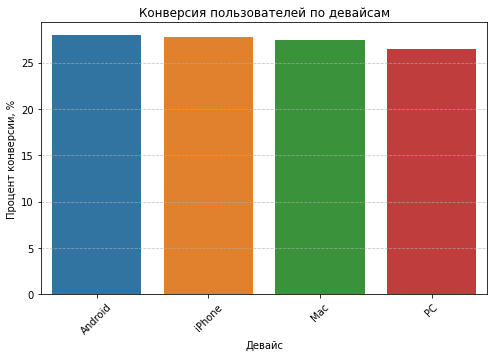

In [51]:
# визуализируем конверсию по устройствам
conv_device = result_raw.groupby('device').agg({'payer': 'mean'}).sort_values(by='payer', ascending=False).reset_index()
conv_device['payer'] = np.round(conv_device['payer'] * 100, 2)

plt.figure(figsize=(8, 5))
sns.barplot(data=conv_device, x="device", y="payer")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Конверсия пользователей по девайсам')
plt.ylabel('Процент конверсии, %')
plt.xlabel('Девайс')
plt.xticks(rotation=45)

plt.show()

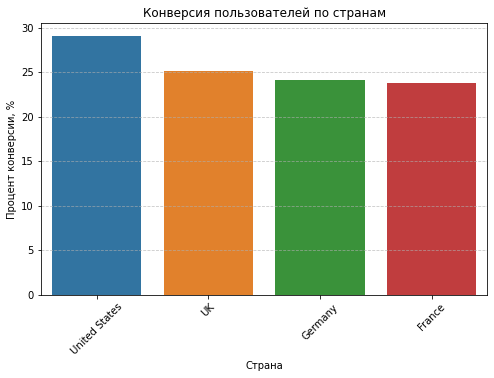

In [52]:
# визуализируем конверсию по странам
conv_device = result_raw.groupby('region').agg({'payer': 'mean'}).sort_values(by='payer', ascending=False).reset_index()
conv_device['payer'] = np.round(conv_device['payer'] * 100, 2)

plt.figure(figsize=(8, 5))
sns.barplot(data=conv_device, x="region", y="payer")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Конверсия пользователей по странам')
plt.ylabel('Процент конверсии, %')
plt.xlabel('Страна')
plt.xticks(rotation=45)

plt.show()

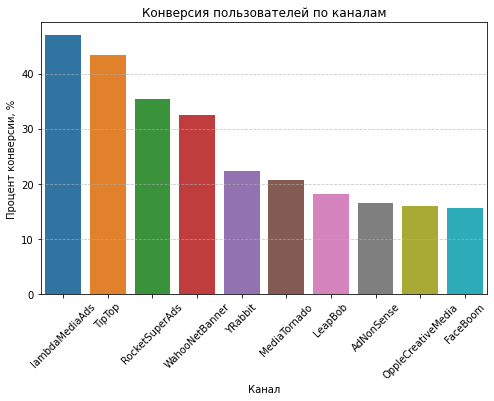

In [53]:
# визуализируем конверсию по каналам
conv_device = result_raw.groupby('channel').agg({'payer': 'mean'}).sort_values(by='payer', ascending=False).reset_index()
conv_device['payer'] = np.round(conv_device['payer'] * 100, 2)

plt.figure(figsize=(8, 5))
sns.barplot(data=conv_device, x="channel", y="payer")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Конверсия пользователей по каналам')
plt.ylabel('Процент конверсии, %')
plt.xlabel('Канал')
plt.xticks(rotation=45)

plt.show()

*Вывод 5.7 конверсия*

1. *Конверсия по девайсам.* Наибольшая конверсию у пользователей Android. Следом идут iPhone и Mac. В аутсайдерах PC, который, как мы помним, единственный окупается. Это говорит о том, что, хоть пользователи PC и менее охотно начинают что-то покупать, но если уж начнут, то окупят затраты на свое привлечение с лихвой. Но в целом конверсия по девайсам не сильно разнится между.
2. *Конверсия по странам.* С большим отрывом лидирует США. Однако, на основе графика CAC и ROI можнем сделать вывод, что эти пользователи обходятся слишком дорого компании и не окупают затрат. Великобритания и Германия и тут крепкие средняки. А Франция стабильно в конце.
3. *Конверсия по каналам.* ТОП-1 канал lambdaMediaAds. Данный канал стабильно привлекает наиболее платящих пользователей. За ним идет Tip Top и RocketSuperAds. WahooNetBanner на 4 месте, а вот FaceBoom и вовсе на последнем.

*Итог*

Визуализация конверсии дала понять, что даже низкая конверсия в совокупности с низкой CAC может привести к окупаемости (пример PC), в то время, как высокая конверсия в связке с высокой CAC легко приведет к убыткам (пример США). Также, стоит отметить два канал - Tip Top и FaceBoom, которые занимают 1-ю и 2-ю строчки по рекламному бюджету, при этом не окупаясь. По уровню конверсии они занимают второе и последнее место соответственоо. Значит, причины неокупаемости тут разные. **В случае с Tip Top большие затраты оправданы с точки зрения конверсии, люди покупают, но недостаточно при таких затратах. А в случае с FaceBoom затраты даже не приводят пользователей до покупки.**

### Визуализируем окупаемость рекламы с разбивкой по девайсам и каналам для каждого региона

Визуализация региона United States по device


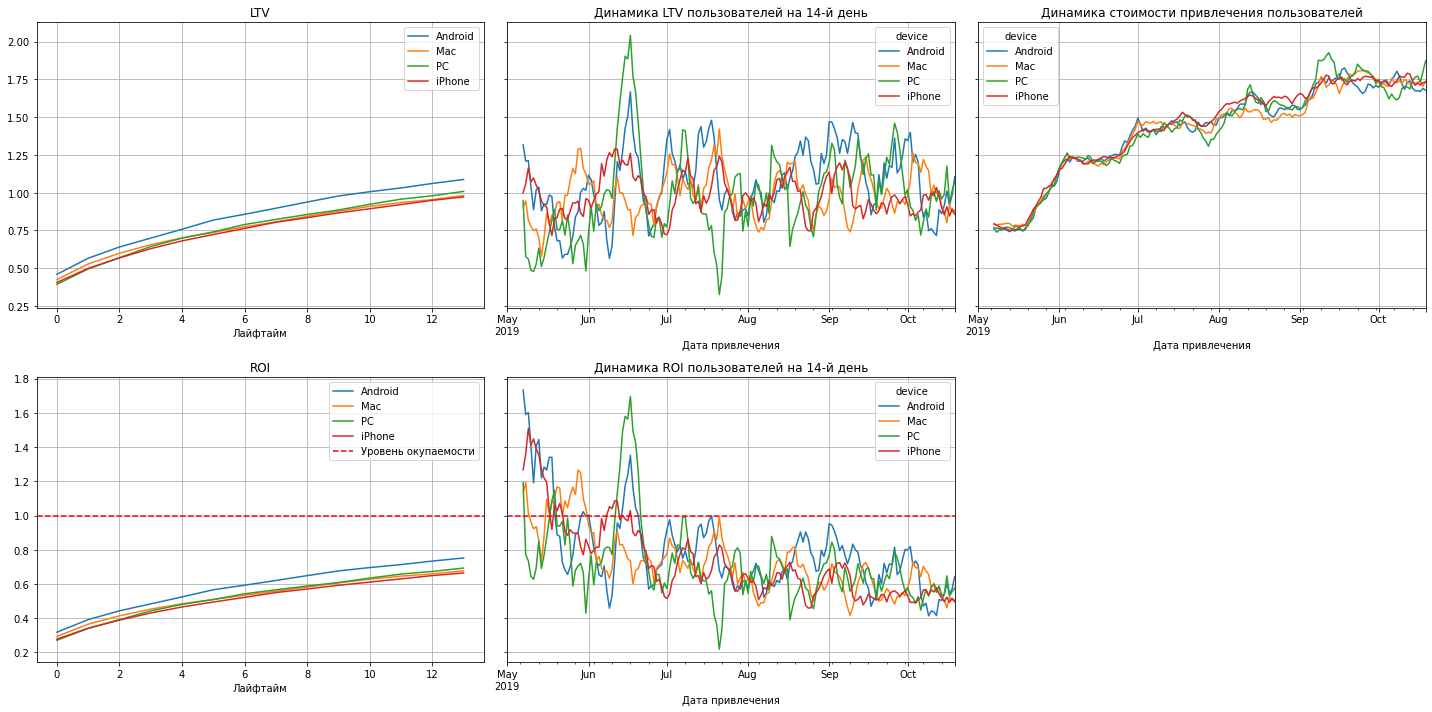

Визуализация региона United States по channel


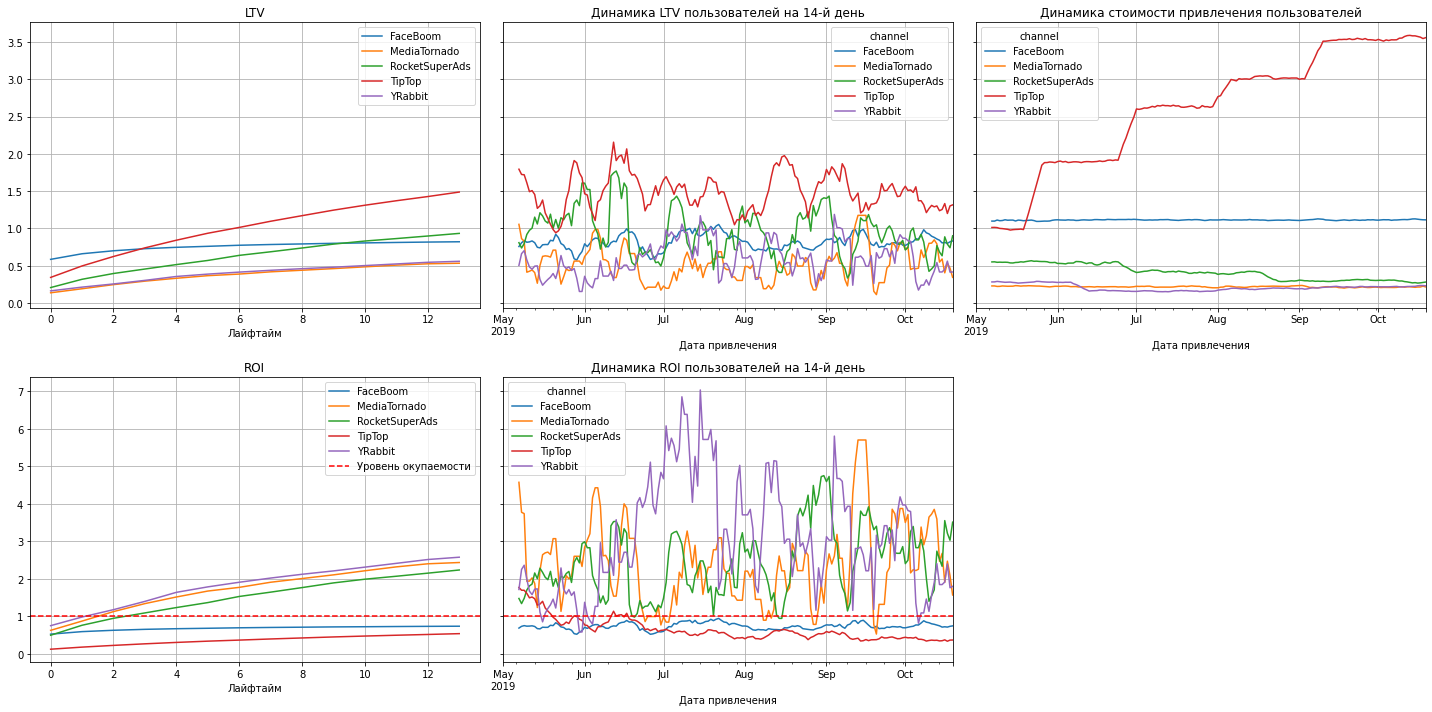

Визуализация региона France по device


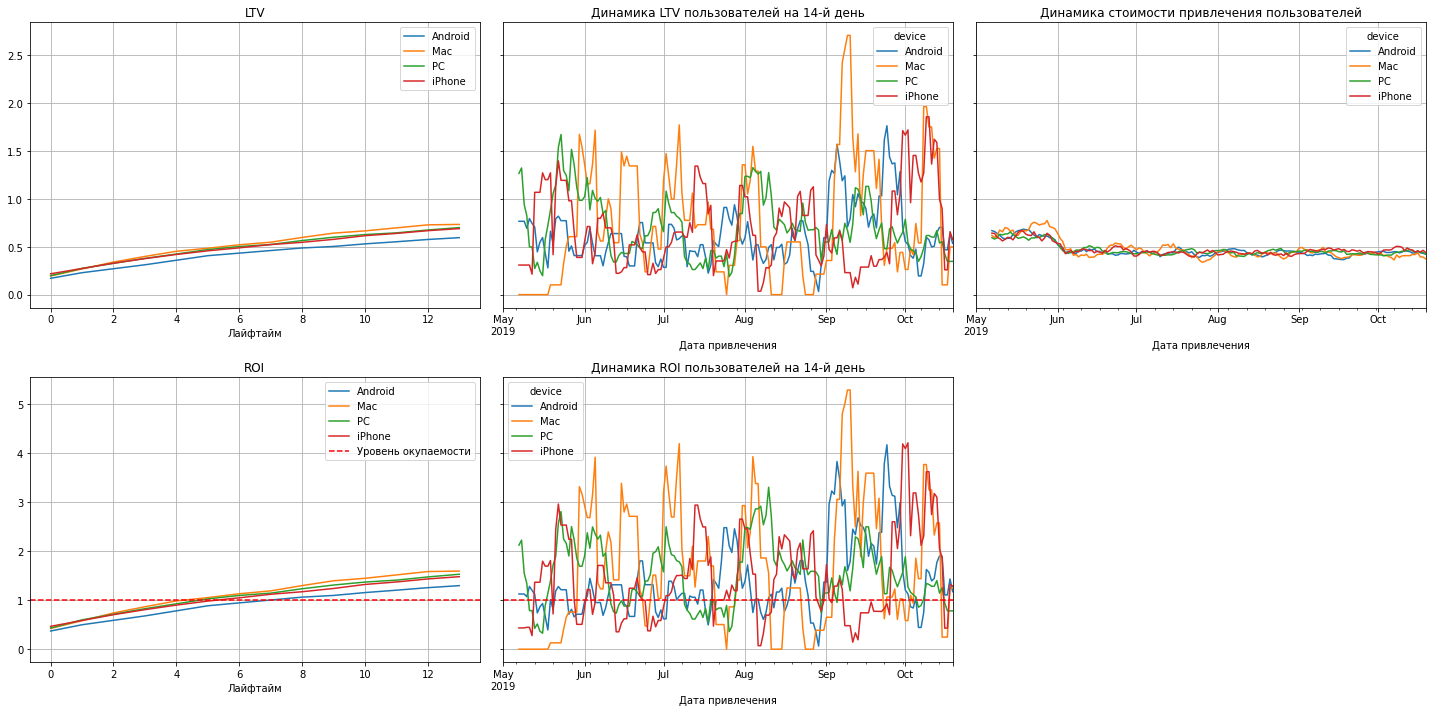

Визуализация региона France по channel


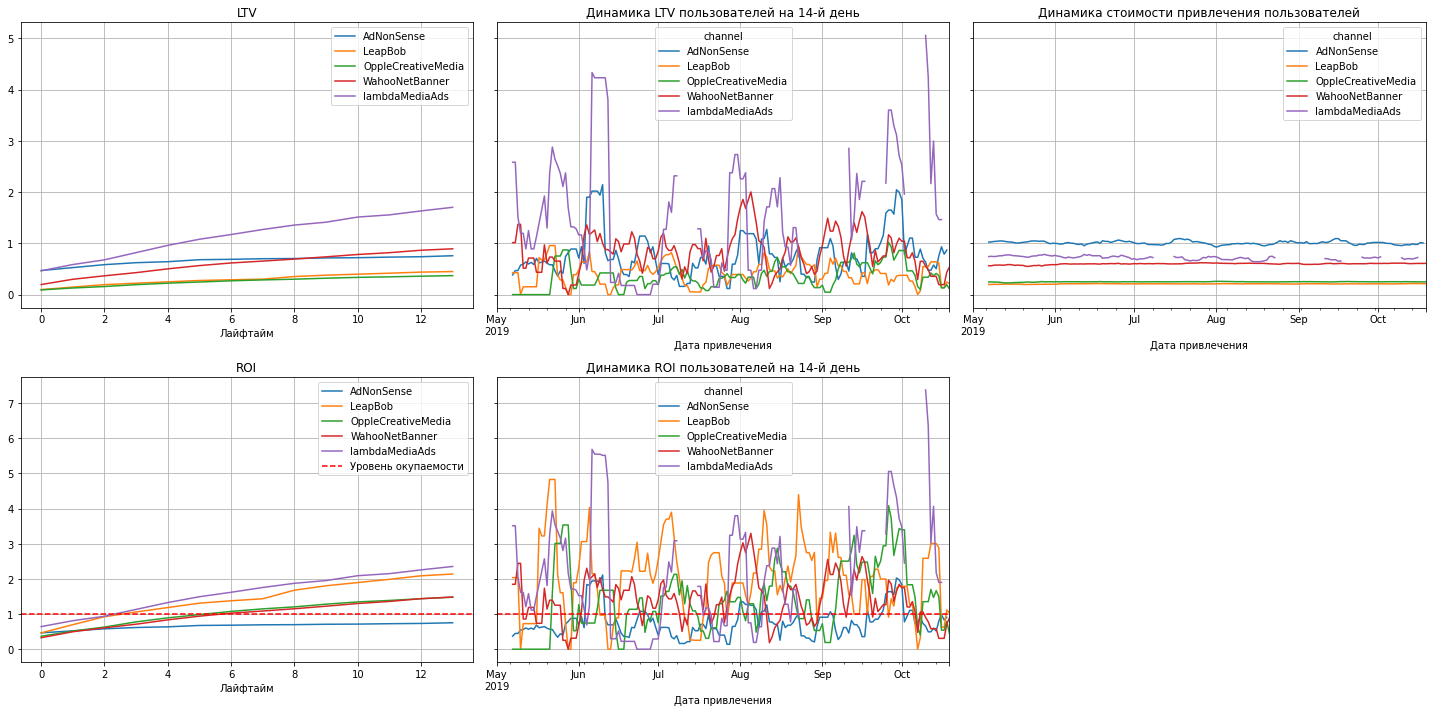

Визуализация региона Germany по device


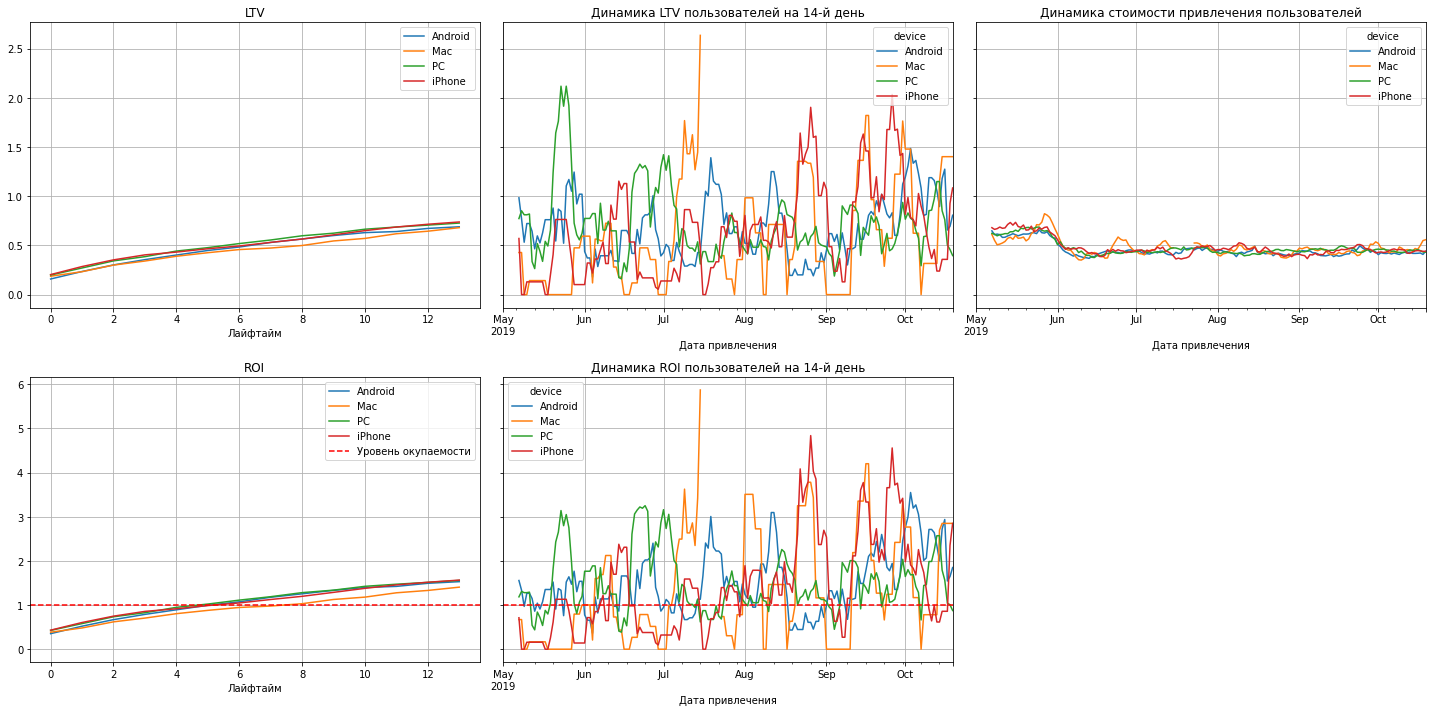

Визуализация региона Germany по channel


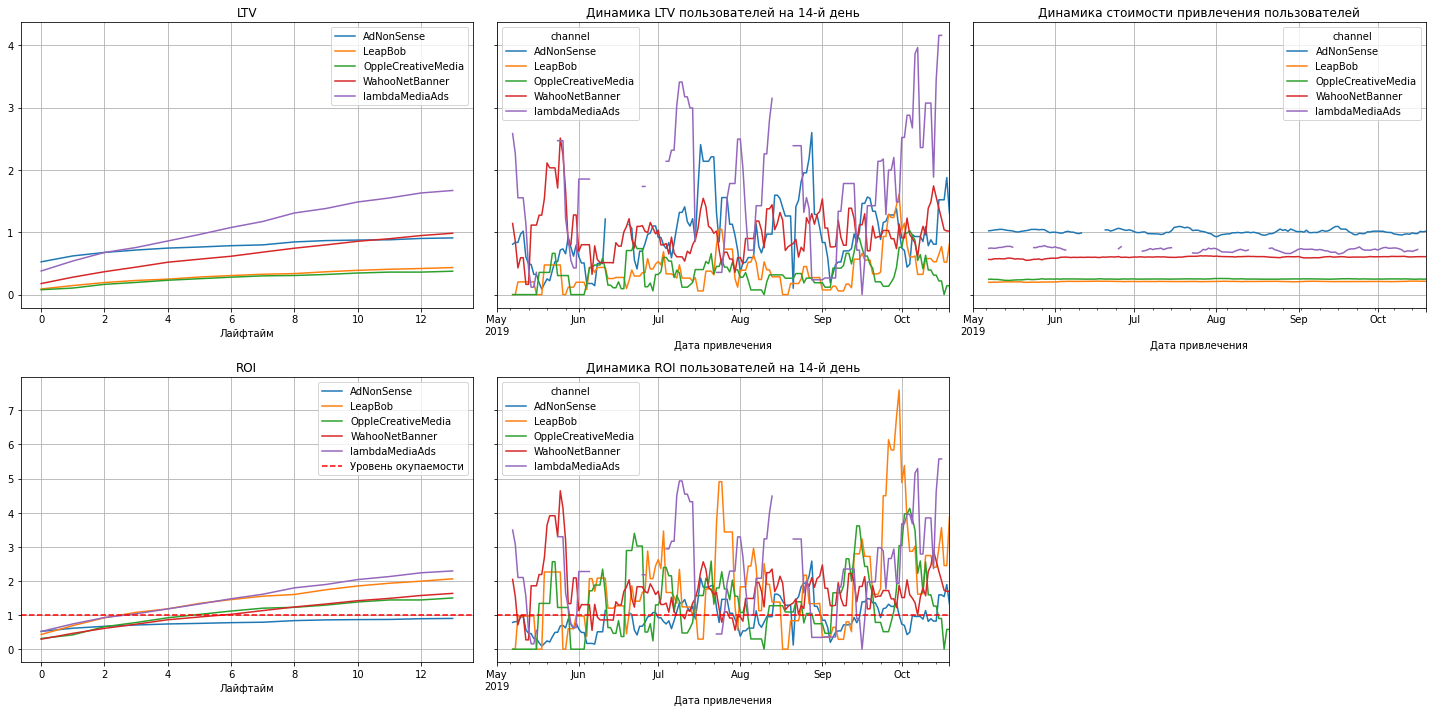

Визуализация региона UK по device


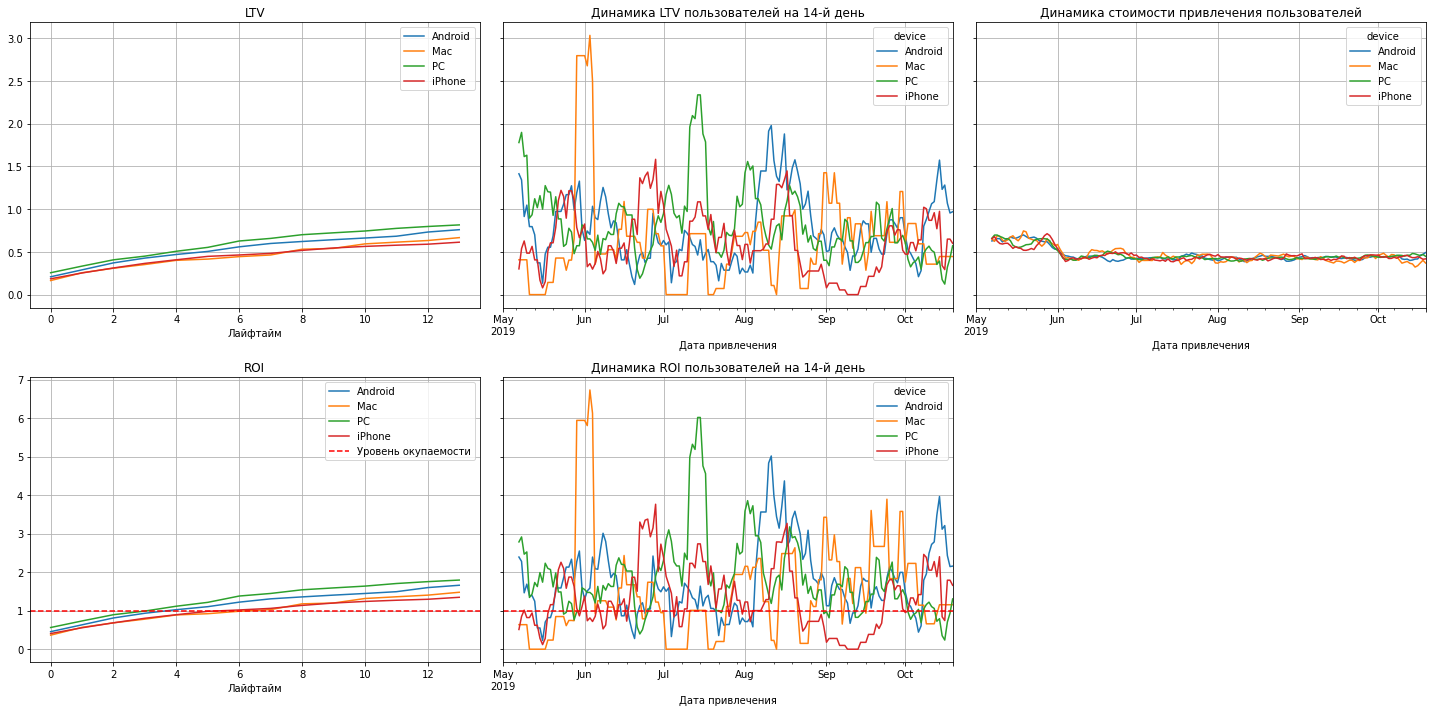

Визуализация региона UK по channel


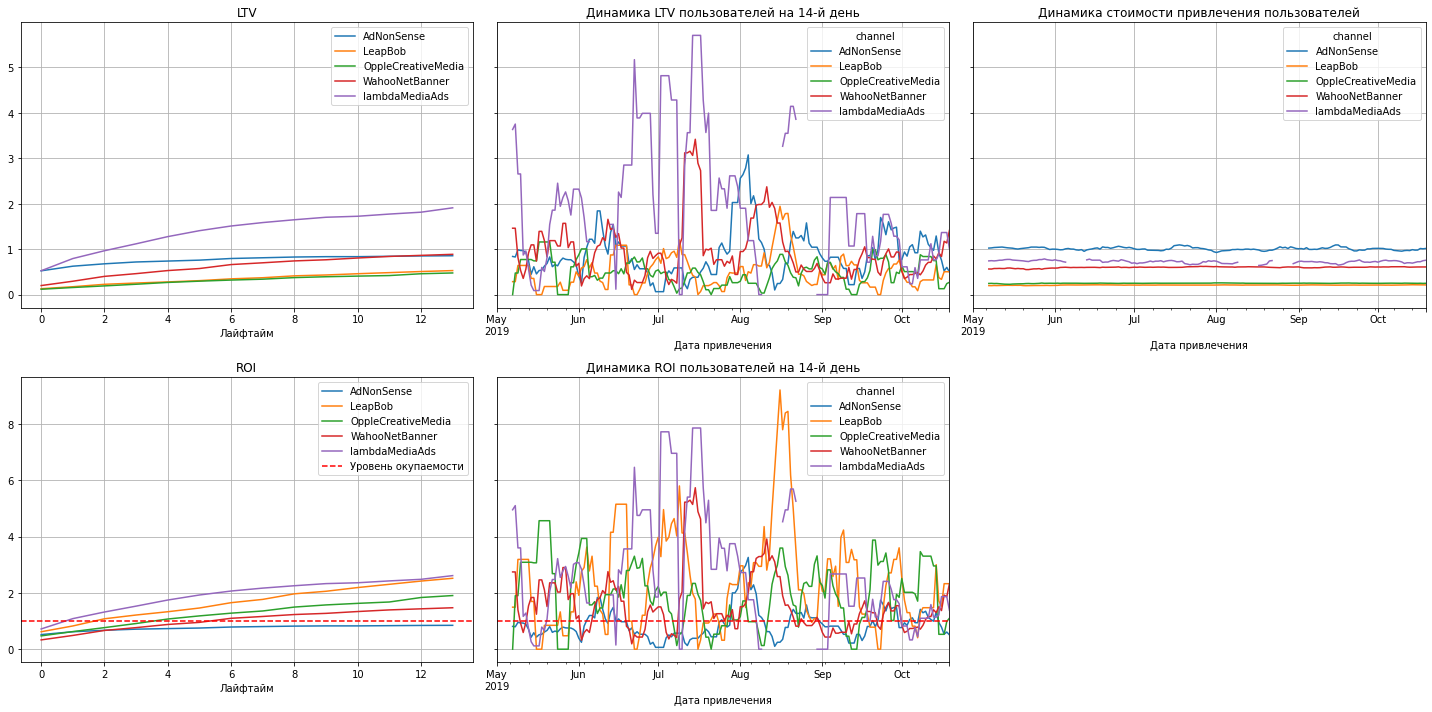

In [54]:
# пройдемся по каждому региону
for i in profiles['region'].unique():
    # пройдемся по девайсам и каналам
    for j in ['device', 'channel']:
        # расчитаем LTV и ROI с разбивкой по устройствам
        raw, ltv, history_ltv, roi, history_toi = get_ltv(profiles[(profiles['channel'] != 'organic') & (profiles['region'] == i)], orders, 
                                                         observation_date, horizon_days, dimensions=[j])
        print(f'Визуализация региона {i} по {j}')
        # визуализируем графики LTV и ROI с разбивкой по устройствам
        plot_ltv_roi(ltv, history_ltv, roi, history_toi, horizon_days)
        
    

*Вывод 5.8 по каждому региону*

Ожидания полностью оправдались! 
Главные пожиратели бюджета, а именно каналы "Tip Top" и "FaceBoom" ориентированы только на США. Только эти два канала не окупаются совершенно и съедают общий бюджет не толькот этого региона, но и всех остальных. 

Стоит отметить, что остальные каналы в США окупаются не позднее, чем через 2 дня, в то время, как каналам в других регионах на это понадобиться от 2 до 5 дней.

### Рассчитаем общую окупаемость рекламы

In [55]:
total_revenue = result_raw['revenue'].sum()
total_cost = result_raw['acquisition_cost'].sum()

if total_revenue > total_cost:
    print(f'''Реклама окупилась! 
Общий доход составляет {total_revenue:.1f} монет
Общие расходы на рекламу составляют {total_cost:.1f} монет
Профицит равен {total_revenue - total_cost:.1f} монет, или {abs((total_cost - total_revenue) / total_cost):.1%}''')
else:
    print(f'''Реклама не окупилась. 
Общий доход составляет {total_revenue:.1f} монет
Общие расходы на рекламу составляют {total_cost:.1f} монет
Дефицит равен {total_cost - total_revenue:.1f} монет, или {abs((total_cost - total_revenue) / total_cost):.1%}''')

Реклама окупилась! 
Общий доход составляет 165663.7 монет
Общие расходы на рекламу составляют 133144.1 монет
Профицит равен 32519.7 монет, или 24.4%


**Вывод 5**

*Для оценки окупаемости были исключены данные о пользователях, привлеченных посредством органических источников. Данное решение принято ввиду того, что данные пользователи ничего не стоили компании, а значит, они могут исказить картину рентабельности рекламной кампании.*

*Общая LTV и ROI*

В мае 2019 года компания решила увеличить расходы на рекламу, что незамедлительно повлекло за собой увеличение стоимости привлечения пользователей. Положительным ожиданием было увеличение количества пользователей и прибыли, которую они приносят. Компания имеет цель окупаемости пользователей в течение 14 дней. Однако, общая картина показала падение рентабельности и даже ее полное отсутствие по мере увеличения бюджета (начиная с июня пользователи не окупаеются за 14 дней).

*Общая конверсия*

Увеличение затрат принесло свои плоды, с конца мая конверсия пошла резко вверх и осталась в среднем на этом уровне.

*Общее удержание*

Однако, на удержании данный факт положительно не сказался, оно оставалось на одном уровне до сентября, а в октябре и вовсе пошло вниз. 
Перечисленные факты говорят о неправильном использовании денежных средства, так как дополнительное инвестирование призвано увеличить объемы возвращаемых денежных средств, а тут растут траты.

*Девайсы*

Анализ пользователей по девайсам показал, что план окупаемости за 14 дней выполняют лишь пользователи PC, которые в свою очередь приносит меньше всех средств, да и конверсия у PC ниже всех. **А вот iPhone и Mac, которые приносят больше всех прибыли окупаются хуже всех.** Пользователи PC и Android более сбалансированы по затратам/прибыли.

*Регионы*

Анализ регионов четко дал понять, куда было направлено увеличение затрат в основном - на США. Да, этот регион приносит больше всех денег, конверсия значительно выше остальных, но при этом **США единственный регион, который перестал окупаться уже в мае и с тех пор окупается все хуже и хуже.** А вот Франция, и, в особенности, Германия и Великобритания стабильно приносят доход компании.

*Рекламные каналы*

Наибольшим LTV неожиданно обладает канал lambdaMediaAds. А вот **большой бюджет каналав "Tip Top" и "FaceBoom" не оправдывает ожиданий. Пользователи, привлекаемые через данные каналы остаются неоправданно дорогими. Увеличившиеся затраты на Tip Top позволили выйти ему на 2-ое место по LTV и конверсии, однако нивелировать в разы увеличившиеся затраты это не помогло. А вот каналу FaceBoom даже конверсию поднять не удалось (конверсия хуже всех), да и LTV посредственное. К этим двум каналам можно добавить канал "AdNonSense", чьи пользователи также не окупаются, имеют 3-ю позицию по стоимости привлечения и 3-ю позицию с конца по конверсии.**

*Девайсы и каналы по регионам*

Исследование показателей с разбивкой по регионам и девайсам и регионам и каналам показало, что 2 канала, на которые приходится более 80% бюджета находятся именно в США. Оба они не окупаются, в то время, как остальные каналы этого региона окупаются быстрее всех остальных - всего за 2 дня. Каналам из остальных 3-х регионов нужно от 2 до 5 дней.

Стоит отметить, что при отсутствии общей окупаемости в течение 14-ти дней, **в общем рекламная кампания имеет положительную дельту, и с мая по октябрь заработала 32519.7 монет, что составляет 24.4% от затрат.** 
Однако, над оптимизацией еще работать и работать.

**Рекомендации**

*Компании стоит пересмотреть политику финансирования рекламных платформ и регионов. Ставка на США и каналы "Tip Top" и "FaceBoom" не только не оправдались, но и привели к уменьшению прибыли. Необходимо перераспределить фокус с объектов с высоким уровнем CAC и низким ROI, на объекты с низким CAC и высоким ROI, а именно:
1. **Совершить внетрирегиональное (касается США) и межрегиональное перераспределение бюджета.**
2. **Снизить интенсивность финансирования каналов Tip Top и FaceBoom. Вместо них стоить уделить внимание вопросу финансирования каналов "lambdaMediaAds", "MediaTornado" и "YRabbit", обладающим низким уровнем CAC, высоким значением ROI и хорошими показателями конверсии."**
3. **Обратить взор на пользователей девайсов Android и PC, обладающих низким CAC и высоким ROI. Android также лучший по уровню конверсии.**

Следование данным рекомендациям позволит увеличить прибыль и приблизит компанию к цели - окупаемость пользователей за 14 дней.

<a class='anchor' id='6-bullet'></a>
# Выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Проведение работы по анализу бизнес-показателей позволили ответить на следующие вопросы:

1. **Причины неэффективности привлечения пользователей.**
    
    * *Неверное внутри- и межрегиональное распределение средств*. 
    
        - Такие каналы, как *Tip Top* и *FaceBoom* были выбраны объектами интенсивного инвестирования (более 80% от общих затрат). По итогу, данные каналы отличились высокими затратами на привлечение одного пользователя CAC, низким возвратом на инвестирование ROI, посредственной конверсией (в случае с FaceBoom). Это привело к стремительному снижению общей рентабельности. 

        - США является лидером по количеству платящих пользователей и количеству прибыли. Однако и стоимость привлечения пользователей тут самая высокая. Поэтому пользователи из США единственные не окупаются и тянут общую рентабельность за грань окупаемости.
        
        - Отдел маркетинга уделяет основное внимание пользователям iPhone и Mac. Да, эти пользователи отличны высокими показателями LTV. Однако, высокий уровень CAC не дает данным пользователям окупаться. Уровень ROI слишком низок.
    
2. **Рекомендации для отдела маркетинга.**

    * *Оптимизировать траты на рекламу. Перераспределить финансовые потоки.*
        
        - Уделить внимание вопросу финансирования каналов "lambdaMediaAds", "MediaTornado" и "YRabbit", обладающим низким уровнем CAC, высоким значением ROI и хорошими показателями конверсии."
        
        - Перераспределить траты с США на Германию и, в особенности, на Великобританию, так как пользователи из данных стран отличаются низким уровнем трат на привлечение CAC и высоким ROI, что их отличает от США, а также высоким уровнем конверсии, в отличии от Франции. Для пользователей из США стоит снизить CAC.
        
        - Обратить взор на пользователей девайсов Android и PC, обладающих низким CAC и высоким ROI. Android также является лучшим по уровню конверсии. У пользователей iPhone и Mac необходимо снизить уровень CAC.
        
**Итог**

**Отделу маркетинга необходимо более пристально следить за уровнем CAC и ROI пользователей из разных когорт и инвестировать в привлечение пользователей из более рентабельно привлекательных регионов, пользующихся подходящими девайсами и использовать для этого не самые дорогие платформы, то есть сосредоточиться на достижении низкого CAC и высокого ROI. Также, не лишним будет диверсификация затрат как по платформам, так и по регионам и девайсам, так как выбор узкого круга объектов инвестирования влечет за собой большой риск потерять деньги.**